In [178]:
#gerekli kütüphanelerimi ekliyorum
import numpy as np #sayısal işlemler
import pandas as pd #veri manipülasyonu ,
import seaborn as sns  # görselleştirme
import matplotlib.pyplot as plt  # görselleştirme

# görsel çıktılardaki uyarı mesajları için
import warnings 
warnings.filterwarnings('ignore')

In [179]:
data = pd.read_excel("/kaggle/input/coffee-shop-analysis/Coffee Shop Sales.xlsx")

In [180]:
data.head() #verinin ilk 5 satırı

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [181]:
data.tail() #verinin son 5satırı

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino
149115,149456,2023-06-30,20:57:19,2,8,Hell's Kitchen,64,0.80,Flavours,Regular syrup,Hazelnut syrup


In [182]:
data.shape 

(149116, 11)

Bu veri setinde 149116 adet satır, 11 sütun bulunmaktadır.

In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


Veri setinde 5 adet object, 4 adet int ve 1 adet float tipinde veri vardır. 1 adette tarih tipinde sutun bulunmaktadır. Hiç boş değer bulunmamaktadır.

In [184]:
#veri setinin bir kopyasını oluşturalım orjinalini bozmamak için

data1 = data.copy()

In [185]:
np.random.seed(34)     ##rastgele satırlarda fakat istediğim sütunlarda 20000 adetlik eksik veri oluşturdum.
random_satirlar = data1.sample(n=20000)
df2 = data1
df2.loc[random_satirlar.index, ['transaction_qty','unit_price','store_id']] = np.nan
df2


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2.0,5.0,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2.0,5.0,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2.0,5.0,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1.0,5.0,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2.0,5.0,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2.0,8.0,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2.0,8.0,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1.0,8.0,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1.0,8.0,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [186]:
data1.isna().sum() #herbir sutunda ne kadar eksik veri var onu görüntüleyelim

transaction_id          0
transaction_date        0
transaction_time        0
transaction_qty     20000
store_id            20000
store_location          0
product_id              0
unit_price          20000
product_category        0
product_type            0
product_detail          0
dtype: int64

In [187]:
data1.isna().sum().sum() #toplamda kaç adet eksik veri var?

60000

Bu veri setinde toplamda 60000 adet eksik veri seti vardır

In [188]:
import numpy as np #oluşturduğum eksik verilere nan değeri yazdırdım

np.random.seed(34)
random_satirlar = data1.sample(n=20000)
df2 = data1
df2.loc[random_satirlar.index, ['transaction_qty','unit_price','store_id']] = np.nan
df2

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2.0,5.0,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2.0,5.0,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2.0,5.0,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1.0,5.0,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2.0,5.0,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2.0,8.0,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2.0,8.0,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1.0,8.0,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1.0,8.0,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [189]:
df2.fillna(method = 'pad')  #nan değerlerini bir önceki değerler ile doldurmayı tercih ettim

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2.0,5.0,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2.0,5.0,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2.0,5.0,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1.0,5.0,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2.0,5.0,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2.0,8.0,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2.0,8.0,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1.0,8.0,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1.0,8.0,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [190]:
df2_categorical = df2.select_dtypes(include = "object")
df2_categorical.head(3)

,transaction_time,store_location,product_category,product_type,product_detail
0,07:06:11,Lower Manhattan,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,07:08:56,Lower Manhattan,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,07:14:04,Lower Manhattan,Drinking Chocolate,Hot chocolate,Dark chocolate Lg


In [191]:
# Kategorik bir değişkendeki benzersiz değerleri gözlemlemek için unique() kullanabiliriz.
df2["product_category"].unique()

array(['Coffee', 'Tea', 'Drinking Chocolate', 'Bakery', 'Flavours',
       'Loose Tea', 'Coffee beans', 'Packaged Chocolate', 'Branded'],
      dtype=object)

In [192]:
df2["product_type"].unique()

array(['Gourmet brewed coffee', 'Brewed Chai tea', 'Hot chocolate',
       'Drip coffee', 'Scone', 'Barista Espresso', 'Brewed Black tea',
       'Brewed Green tea', 'Brewed herbal tea', 'Biscotti', 'Pastry',
       'Organic brewed coffee', 'Premium brewed coffee', 'Regular syrup',
       'Herbal tea', 'Gourmet Beans', 'Organic Beans', 'Sugar free syrup',
       'Drinking Chocolate', 'Premium Beans', 'Chai tea', 'Green beans',
       'Espresso Beans', 'Green tea', 'Organic Chocolate', 'Housewares',
       'Black tea', 'House blend Beans', 'Clothing'], dtype=object)

In [193]:
df2["product_detail"].unique()

array(['Ethiopia Rg', 'Spicy Eye Opener Chai Lg', 'Dark chocolate Lg',
       'Our Old Time Diner Blend Sm', 'Oatmeal Scone',
       'Columbian Medium Roast Sm', 'Latte Rg', 'Dark chocolate Rg',
       'Spicy Eye Opener Chai Rg', 'Ethiopia Lg', 'Earl Grey Lg',
       'Ouro Brasileiro shot', 'Serenity Green Tea Lg',
       'Jumbo Savory Scone', 'Lemon Grass Rg',
       'Sustainably Grown Organic Lg', 'Hazelnut Biscotti', 'Cappuccino',
       'Lemon Grass Lg', 'Chocolate Chip Biscotti', 'Peppermint Lg',
       'Chocolate Croissant', 'Latte', 'Brazilian Rg', 'Brazilian Lg',
       'Columbian Medium Roast Rg', 'Morning Sunrise Chai Rg',
       'Morning Sunrise Chai Lg', 'Our Old Time Diner Blend Lg',
       'Sustainably Grown Organic Rg', 'Scottish Cream Scone ',
       'Peppermint Rg', 'English Breakfast Rg',
       'Our Old Time Diner Blend Rg', 'Serenity Green Tea Rg',
       'Brazilian Sm', 'Jamaican Coffee River Sm',
       'Jamaican Coffee River Lg', 'Ginger Biscotti',
       'Tradit

In [194]:
for col in df2_categorical.columns:
    print(f'There are {df2_categorical[col].nunique()} unique values in "{col}" categorical feature.\n')

There are 25762 unique values in "transaction_time" categorical feature.

There are 3 unique values in "store_location" categorical feature.

There are 9 unique values in "product_category" categorical feature.

There are 29 unique values in "product_type" categorical feature.

There are 80 unique values in "product_detail" categorical feature.



In [195]:
for col in df2_categorical.columns:
    print(f'{df2_categorical[col].value_counts()}\n', 5*"*********")

transaction_time
09:31:15    41
08:15:41    40
08:19:08    38
10:34:04    36
11:40:03    36
            ..
08:49:36     1
13:41:27     1
19:03:58     1
18:16:13     1
16:59:49     1
Name: count, Length: 25762, dtype: int64
 *********************************************
store_location
Hell's Kitchen     50735
Astoria            50599
Lower Manhattan    47782
Name: count, dtype: int64
 *********************************************
product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Packaged Chocolate      487
Name: count, dtype: int64
 *********************************************
product_type
Brewed Chai tea          17183
Gourmet brewed coffee    16912
Barista Espresso         16403
Hot chocolate            11468
Brewed Black tea         11350
Brewed herbal tea        11245
Scone                    1

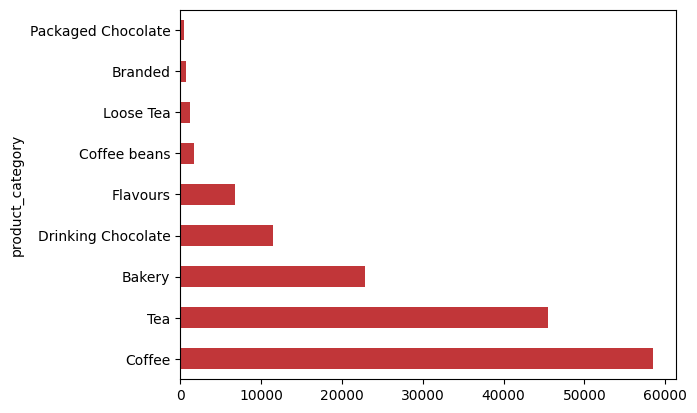

In [196]:
# Kategorik bir değişkendeki kategorilerin gözlem sayılarını basitçe görselleştirelim.
df2['product_category'].value_counts().plot.barh();

En çok satışı coffe ve en az satışı ise packaged chocolate olarak gerrçekleşmiştir.

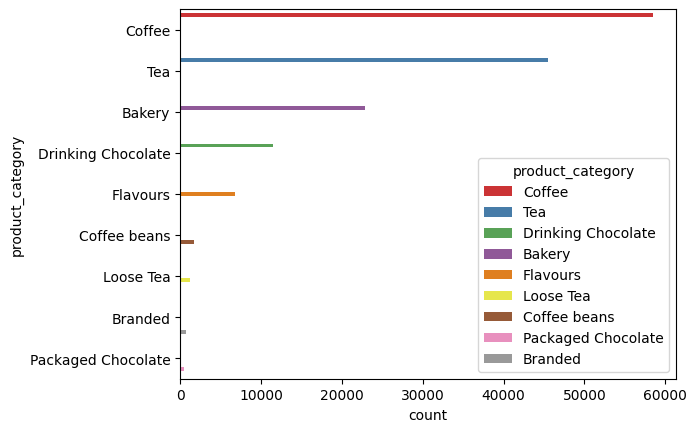

In [197]:
sns.countplot(data = df2,
              y = "product_category",
              hue = "product_category",
              order = df2["product_category"].value_counts().index,
              palette = "Set1");

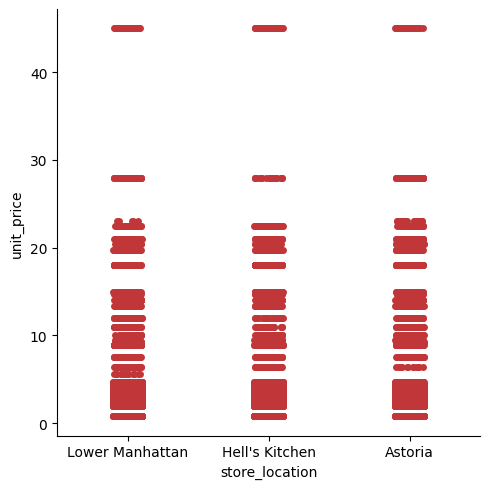

In [198]:
sns.catplot(data = data,
            x = "store_location",
            y = "unit_price");

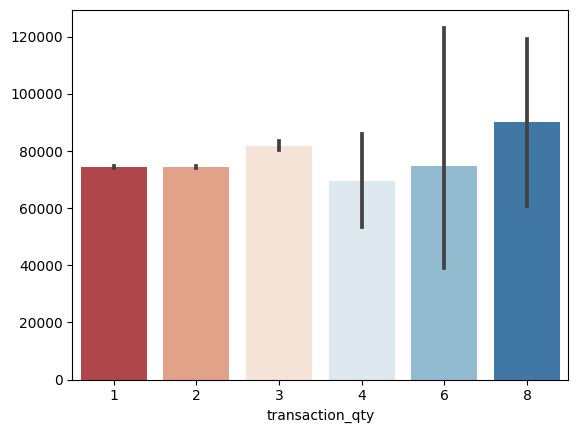

In [199]:
sns.barplot(data = data, x = "transaction_qty", y = data.transaction_qty.index);

Bu grafikte "transaction quality" değişkenin işlem kalite derecelerine göre sıralamış oluyoruz. En yüksek işlem kalite derecesi 8' dir ve en çok satış bu işlem kalite derecesinden gerçekleşmiştir.

In [200]:
data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [201]:
data_price = data.groupby(by = "store_location")["unit_price"].mean().to_frame().reset_index().sort_values(by = "unit_price", ascending = False)

data_price

,store_location,unit_price
1,Hell's Kitchen,3.394218
0,Astoria,3.384897
2,Lower Manhattan,3.366643


Bölge bayilere göre ortalama ne kadar satış yapıldığını öğrendik.

In [202]:
data.groupby(by = ['product_category', 'transaction_qty'])['unit_price'].mean().to_frame().reset_index().sort_values(by = "product_category", ascending = False)[:10]

,product_category,transaction_qty,unit_price
25,Tea,3,2.799349
24,Tea,2,2.816880
23,Tea,1,2.818387
22,Packaged Chocolate,1,9.050595
21,Loose Tea,1,9.267438
20,Flavours,4,0.800000
19,Flavours,3,0.800000
18,Flavours,2,0.800000
17,Flavours,1,0.800000
14,Drinking Chocolate,1,4.148630


In [203]:
data_numerical = data.select_dtypes(include = ["float64", "int64"])
data_numerical.head()

,transaction_id,transaction_qty,store_id,product_id,unit_price
0,1,2,5,32,3.0
1,2,2,5,57,3.1
2,3,2,5,59,4.5
3,4,1,5,22,2.0
4,5,2,5,57,3.1


In [204]:
data_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,149116.0,74737.371872,43153.600016,1.0,37335.75,74727.5,112094.25,149456.0
transaction_qty,149116.0,1.438276,0.542509,1.0,1.00,1.0,2.00,8.0
store_id,149116.0,5.342063,2.074241,3.0,3.00,5.0,8.00,8.0
product_id,149116.0,47.918607,17.930020,1.0,33.00,47.0,60.00,87.0
unit_price,149116.0,3.382219,2.658723,0.8,2.50,3.0,3.75,45.0


In [205]:
# Bir veri setindeki numerik kolonların istatistiksel bilgilerine erişmek için basitçe bu tarz bir fonksiyon yazabiliriz.

def give_stats(dataframe: pd.DataFrame) -> None:
   

    num_df = dataframe.select_dtypes(include = ["float", "int"])

    for col in num_df.columns:
        print(f"**********{col}**********")
        print(f"Mean value of {col} is {num_df[col].mean():.2f}")
        print(f"Std value of {col} is {num_df[col].std():.2f}")
        print(f"Max value of {col} is {num_df[col].max()}")
        print(f"Min value of {col} is {num_df[col].min()}")
        print(f"Count value of {col} is {num_df[col].count()}")
        print(f"Median value of {col} is {num_df[col].median()}\n")

give_stats(dataframe = data)

**********transaction_id**********
Mean value of transaction_id is 74737.37
Std value of transaction_id is 43153.60
Max value of transaction_id is 149456
Min value of transaction_id is 1
Count value of transaction_id is 149116
Median value of transaction_id is 74727.5

**********transaction_qty**********
Mean value of transaction_qty is 1.44
Std value of transaction_qty is 0.54
Max value of transaction_qty is 8
Min value of transaction_qty is 1
Count value of transaction_qty is 149116
Median value of transaction_qty is 1.0

**********store_id**********
Mean value of store_id is 5.34
Std value of store_id is 2.07
Max value of store_id is 8
Min value of store_id is 3
Count value of store_id is 149116
Median value of store_id is 5.0

**********product_id**********
Mean value of product_id is 47.92
Std value of product_id is 17.93
Max value of product_id is 87
Min value of product_id is 1
Count value of product_id is 149116
Median value of product_id is 47.0

**********unit_price**********

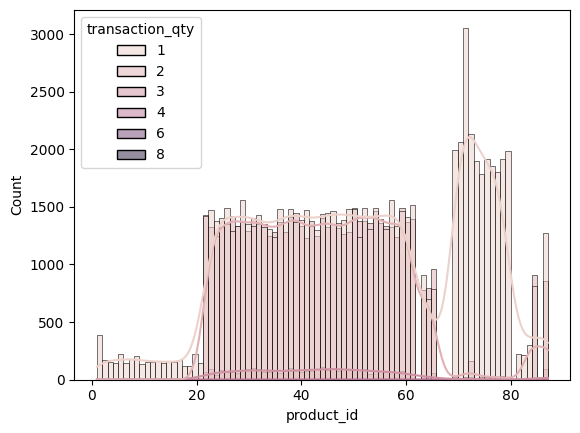

In [206]:
sns.histplot(data = data , x = "product_id", kde = True, hue = "transaction_qty");

Ürün ıd numaralrına göre işlem kalitesi dağılımını görüntüledim.

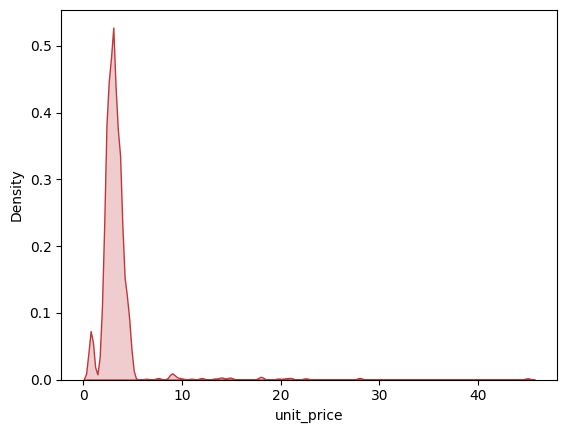

In [207]:
# kdeplot ise ilgili numerik değişkenin yoğunluğunu gösterir.
sns.kdeplot(data['unit_price'], fill = True);

In [208]:
# yeni sutun olarak yıl ekledim
data["year"] = data["transaction_date"].dt.year

# ay 
data["month"] = data["transaction_date"].dt.month_name()

# gün
data["day"] = data["transaction_date"].dt.day_name()

In [209]:
data["year"].unique()

array([2023], dtype=int32)

In [210]:
data["month"].unique()

array(['January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

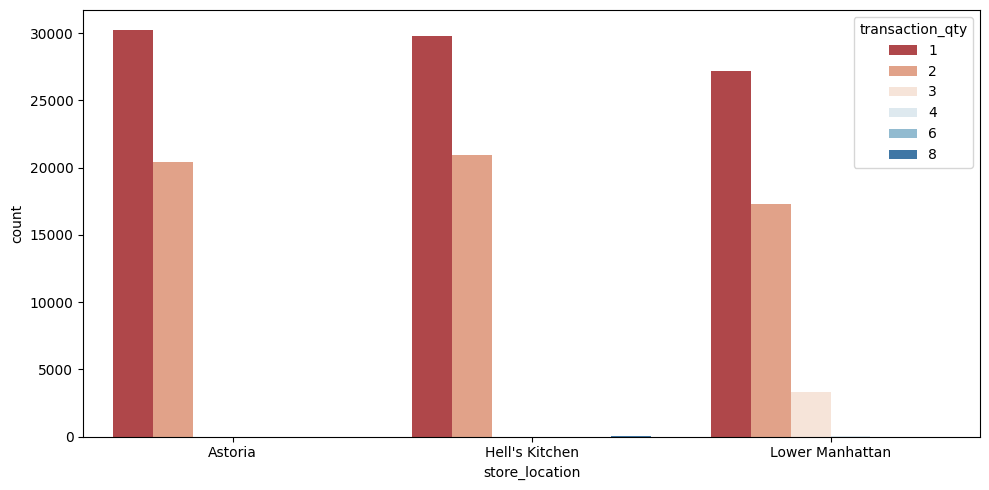

In [219]:
grouped_data = data.groupby("store_location")["transaction_qty"].value_counts().reset_index(name = "count")


plt.figure(figsize=(10, 5))


sns.barplot(x = "store_location", y = "count", hue = "transaction_qty", data = grouped_data)

plt.tight_layout()
plt.show()